# SUOD - Scalable Unsupervised Outlier Detection
### SUOD is an acceleration framework for large scale unsupervised outlier detector training and prediction
Source: https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.suod

### Arguments that work with SUOD algorithm:
1. base_estimators
2. contamination
3. combination
4. n_jobs
5. rp_clf_list
6. rp_ng_clf_list
7. rp_flag_global
8. target_dim_frac
9. jl_method
10. bps_flag
11. approx_clf_list
12. approx_ng_clf_list
13. approx_flag_global
14. approx_clf
15. cost_forecast_loc_fit
16. cost_forecast_loc_pred
17. verbose

In [4]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
imgs = O.DataHelper.get2D(N = 100, config_num=5, randomize=True, timing=True)
downsampled_imgs = O.Normalize.downsample(imgs, output_shape=(64, 64), flatten=True, timing=True)

get2D                    ...took    55.351229 seconds
image downsampling       ...took     0.455955 seconds
image downsampling       ...took     1.480391 seconds
image downsampling       ...took     1.936836 seconds
image downsampling       ...took     2.958689 seconds
image downsampling       ...took     3.981289 seconds
image downsampling       ...took     4.438402 seconds
image downsampling       ...took     4.895775 seconds
image downsampling       ...took     7.860455 seconds
image downsampling       ...took     8.317976 seconds
image downsampling       ...took     9.720942 seconds
image downsampling       ...took    10.178333 seconds
image downsampling       ...took    10.635969 seconds
image downsampling       ...took    11.094062 seconds
image downsampling       ...took    11.551363 seconds
image downsampling       ...took    12.223469 seconds
image downsampling       ...took    13.928383 seconds
image downsampling       ...took    17.833071 seconds
image downsampling       ...

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s finished


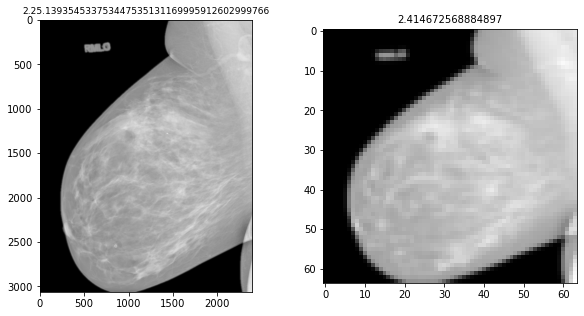

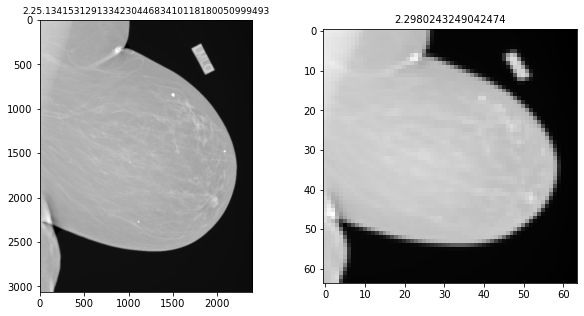

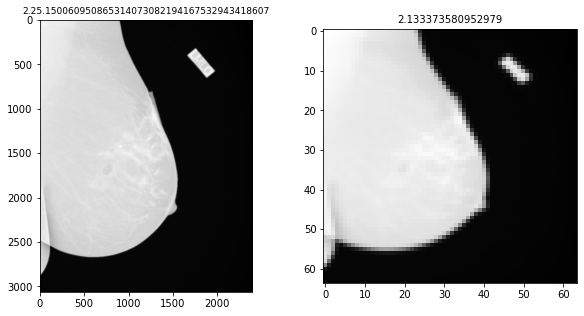

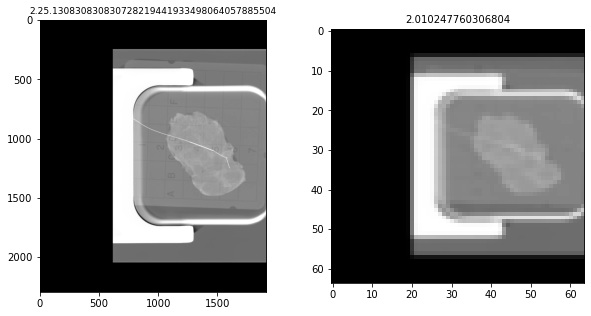

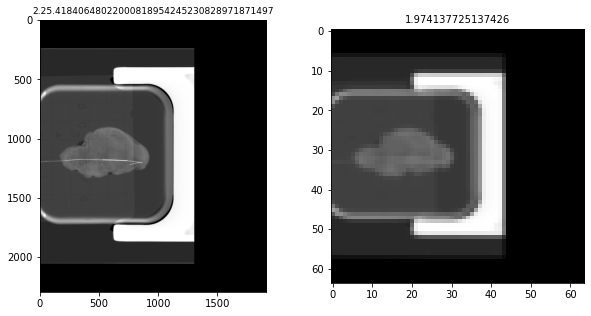

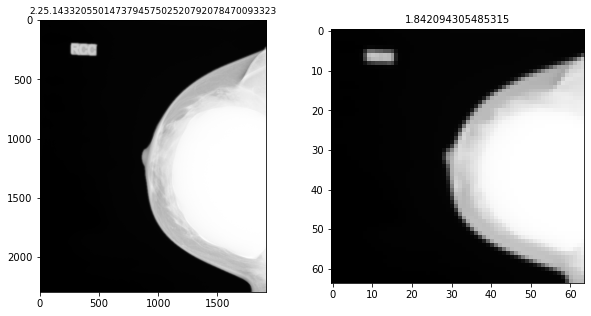

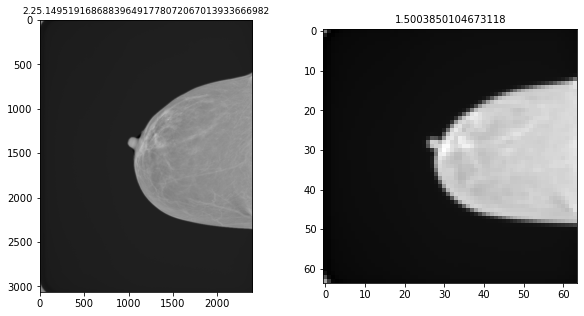

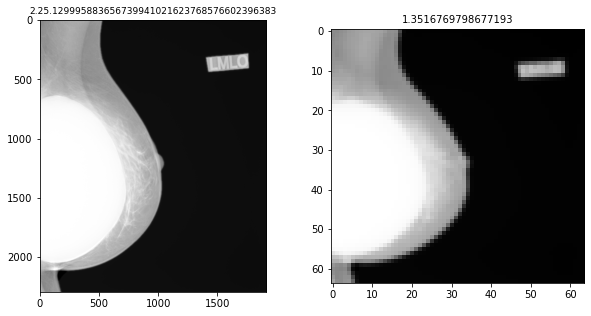

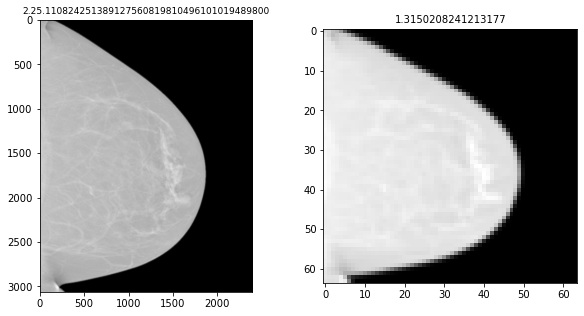

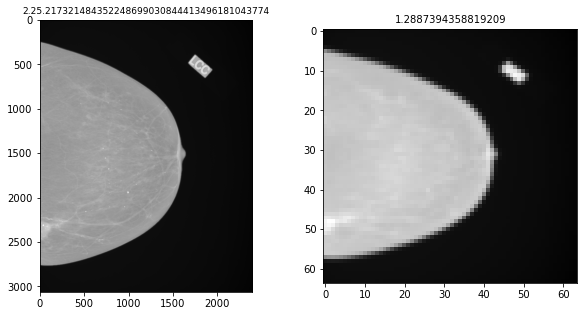

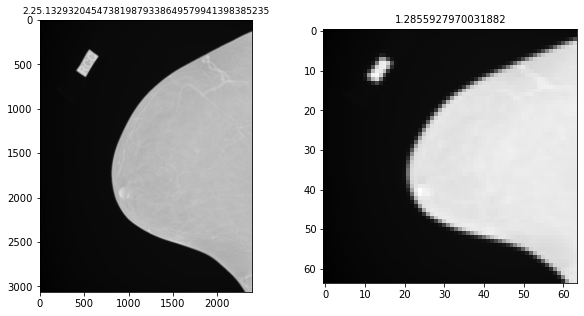

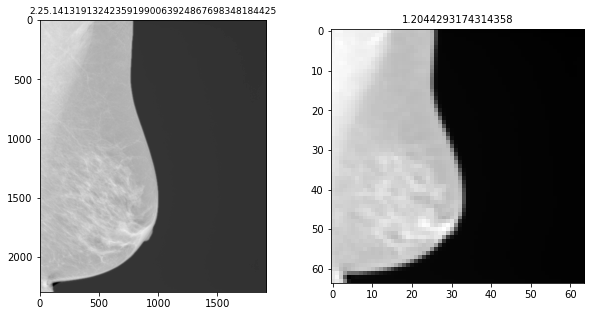

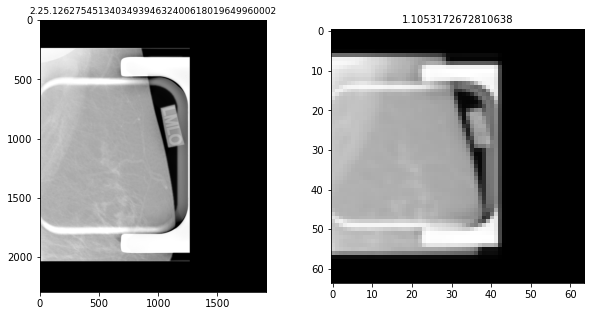

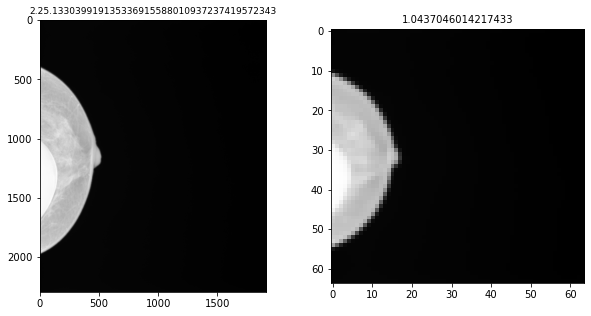

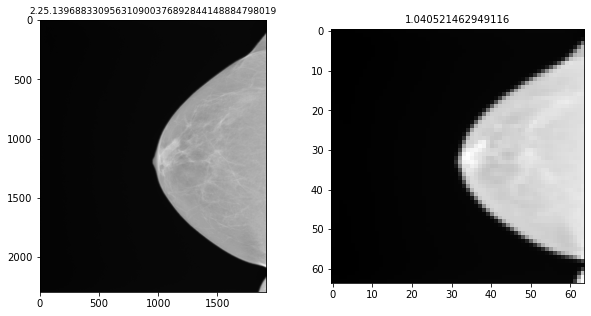

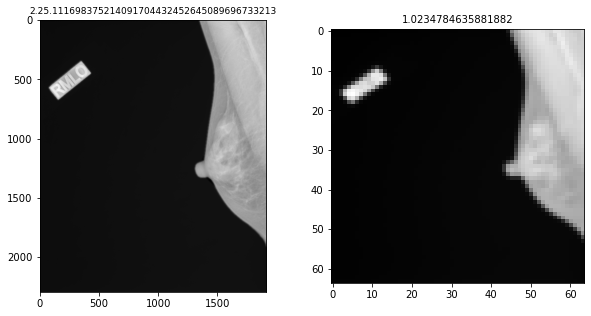

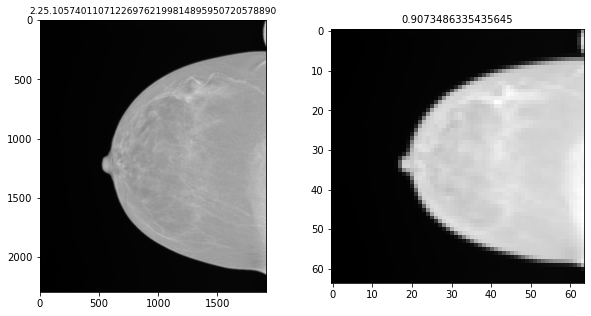

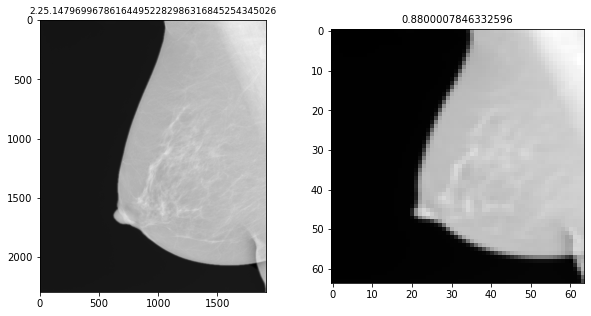

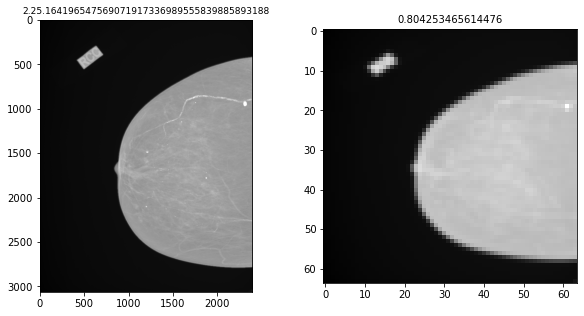

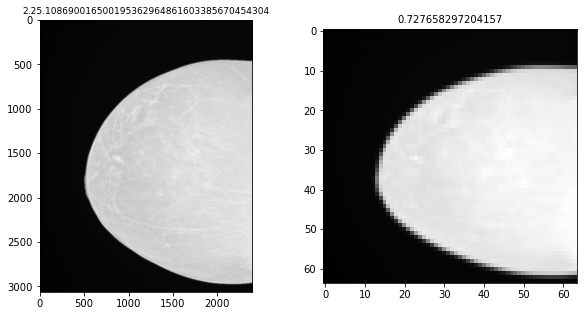

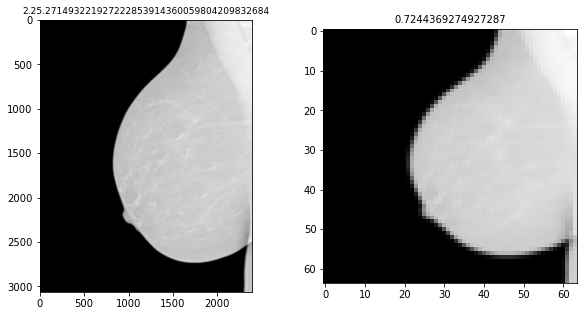

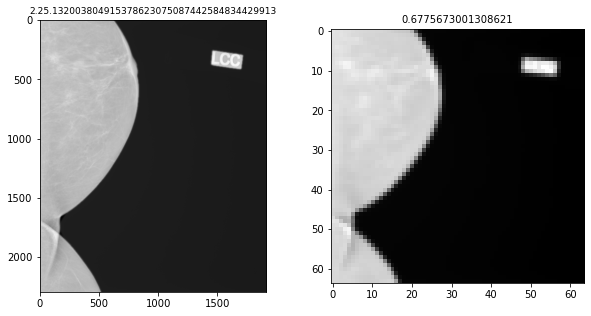

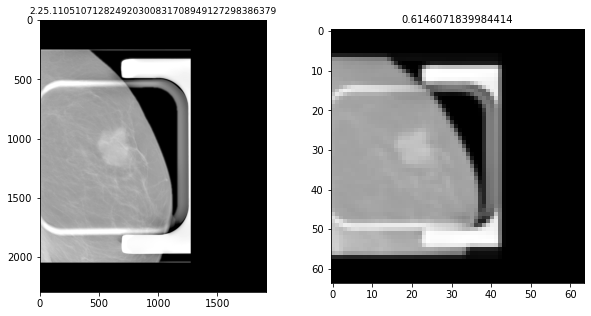

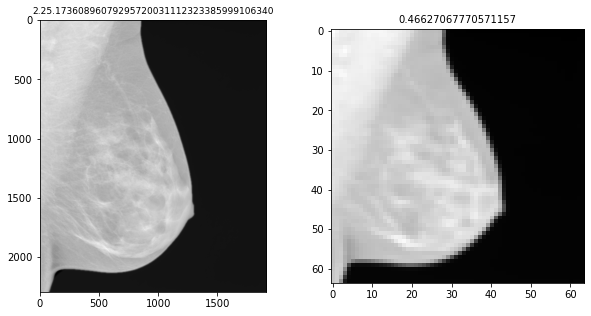

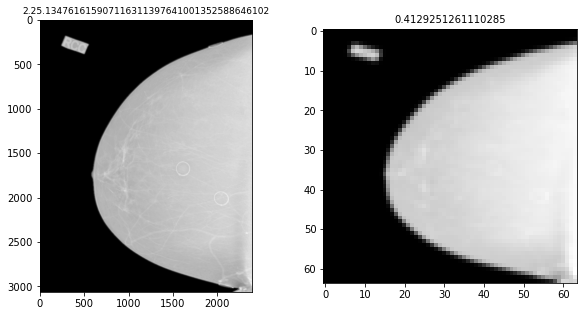

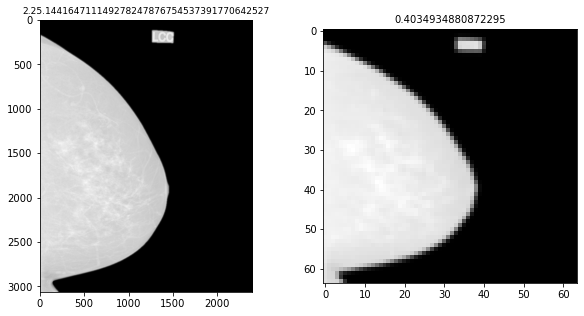

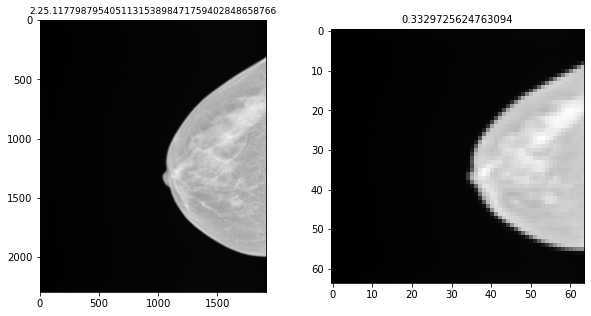

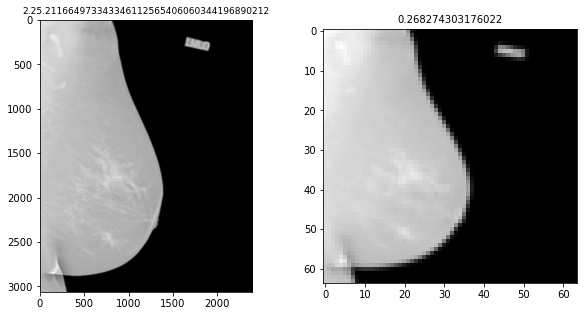

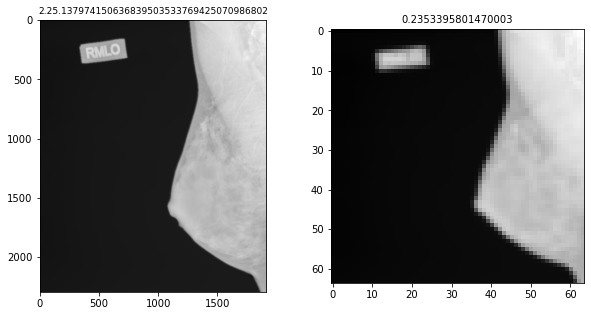

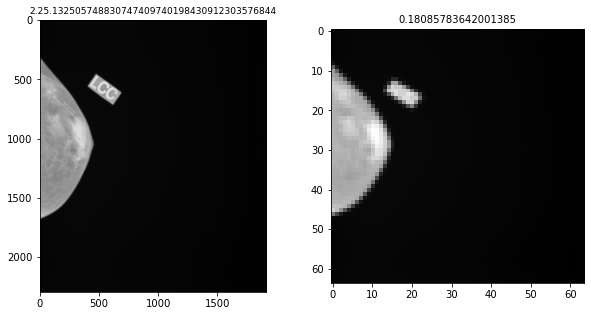

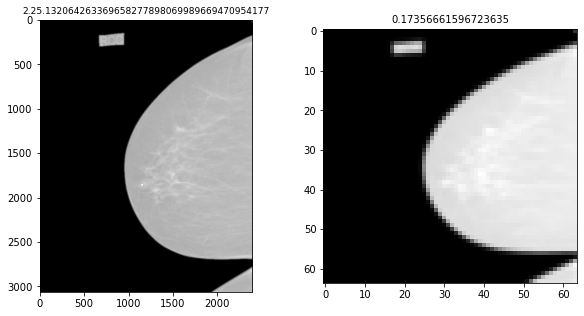

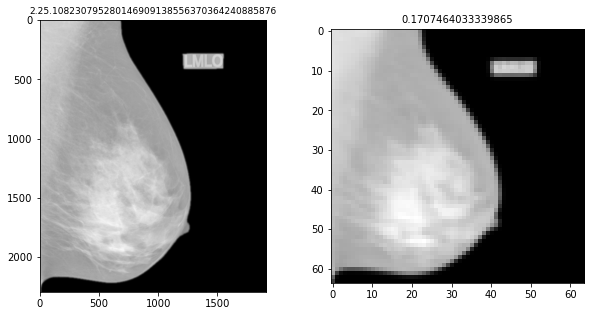

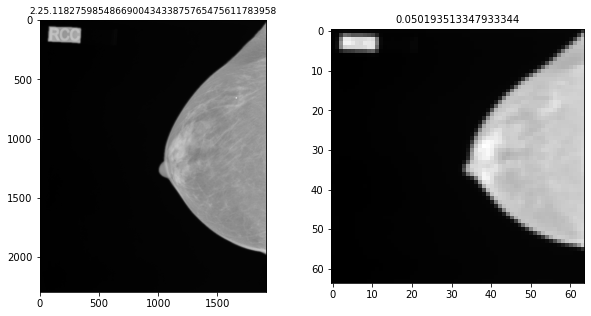

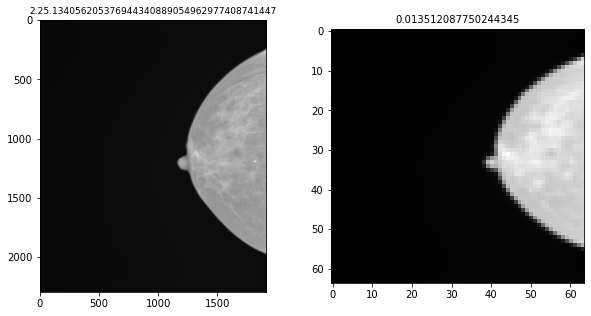

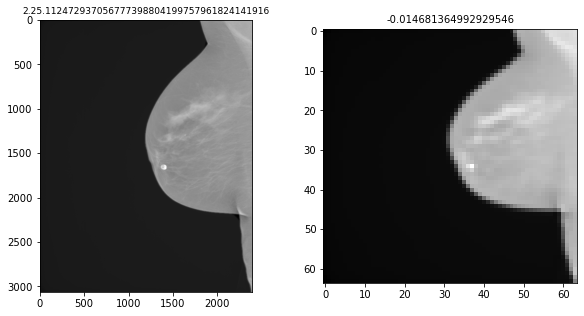

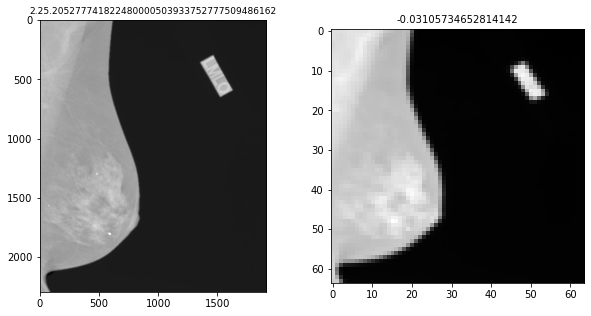

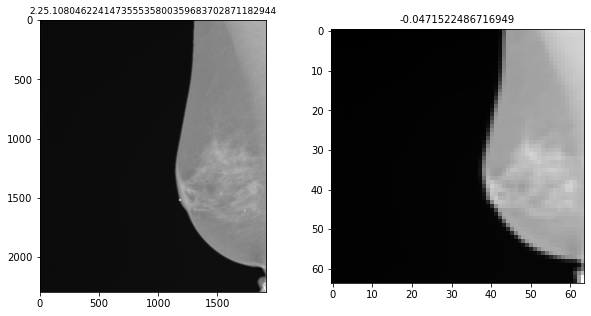

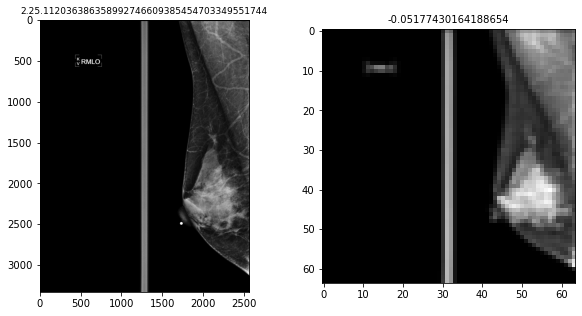

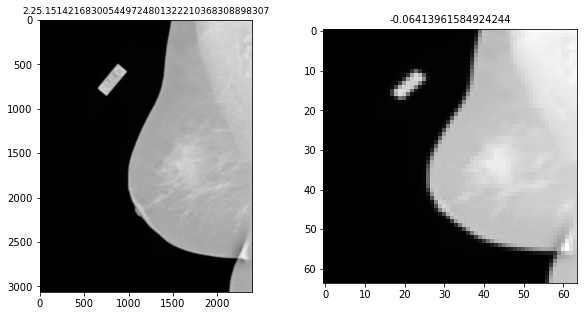

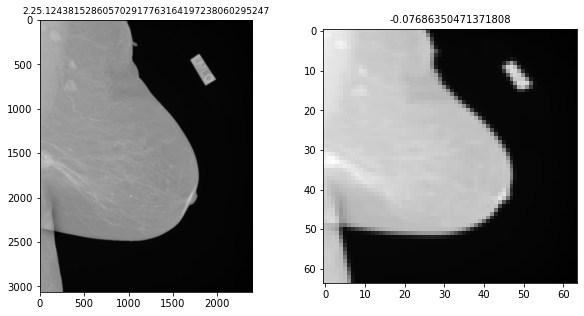

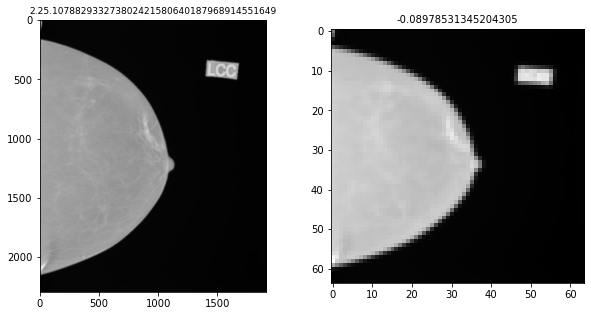

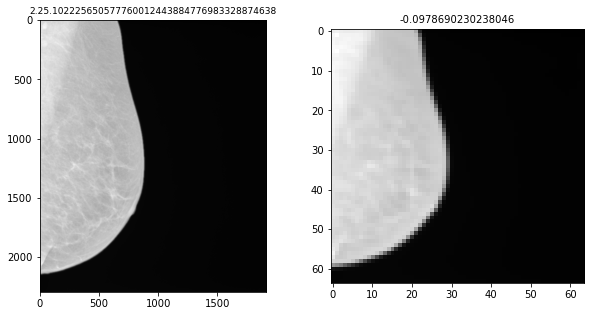

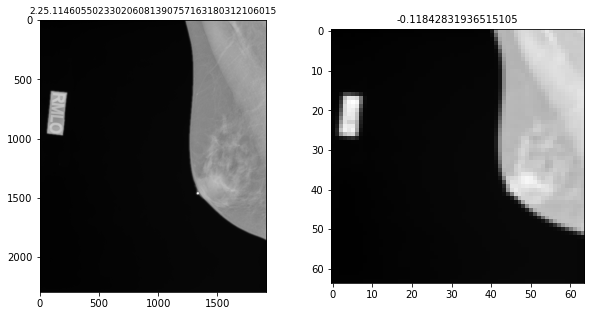

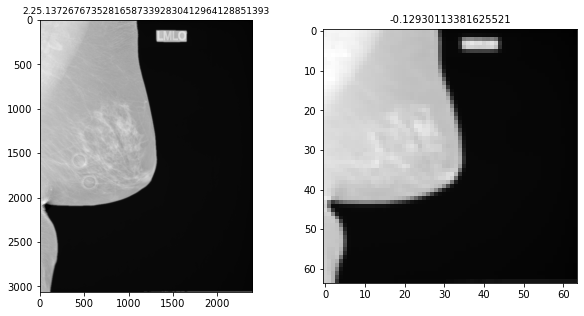

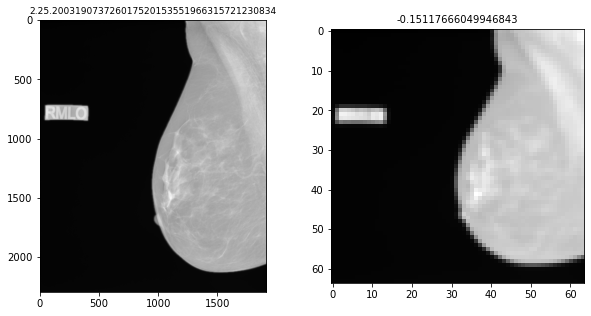

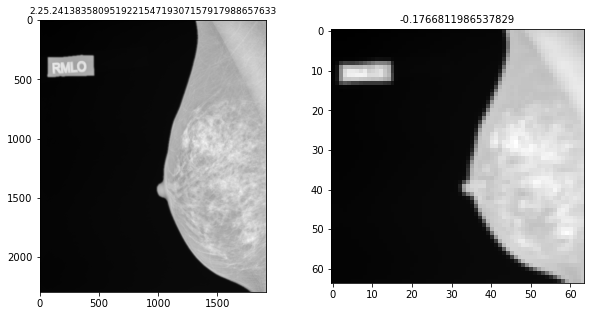

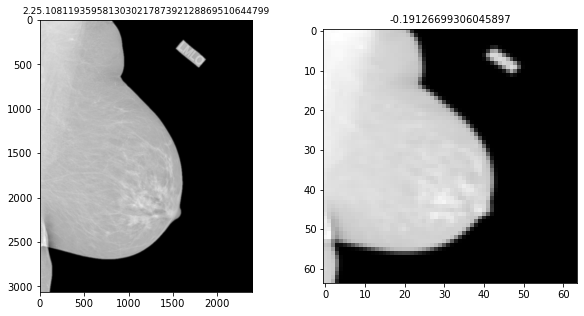

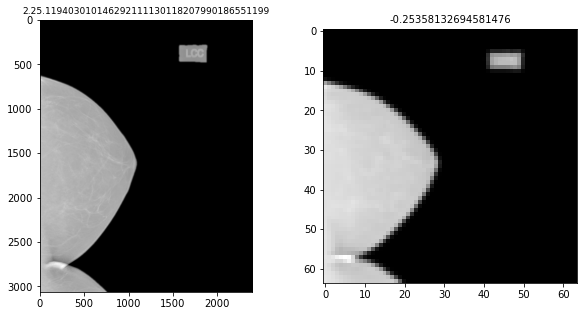

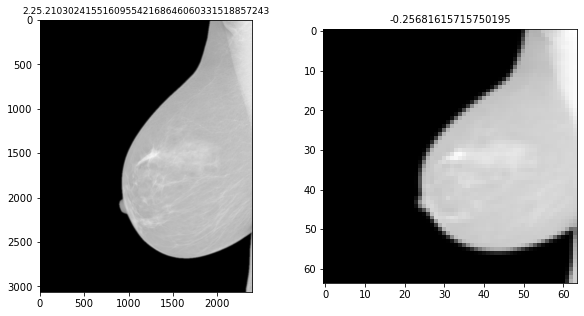

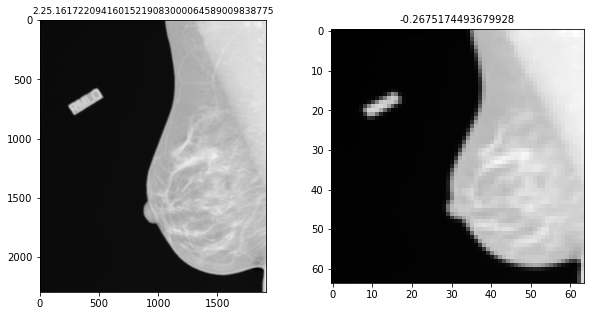

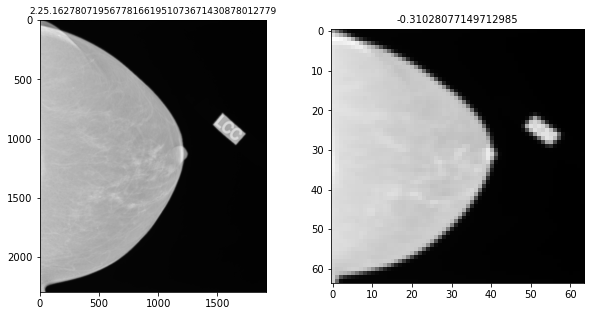

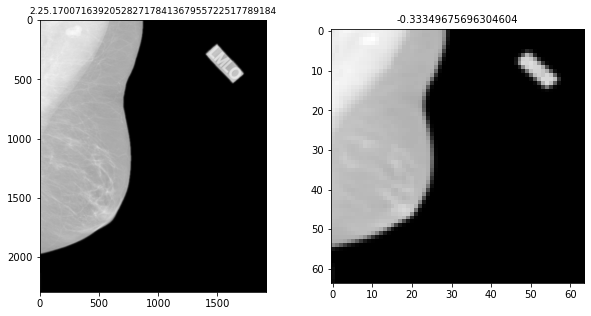

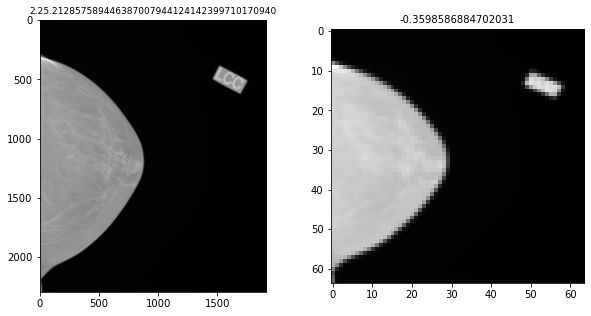

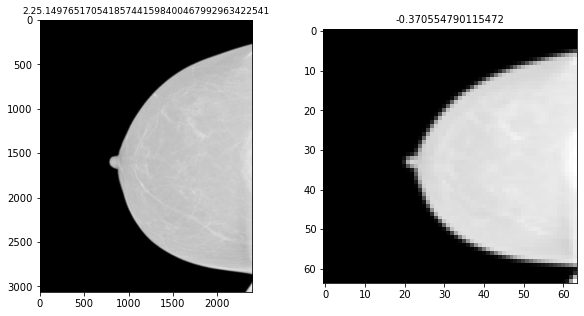

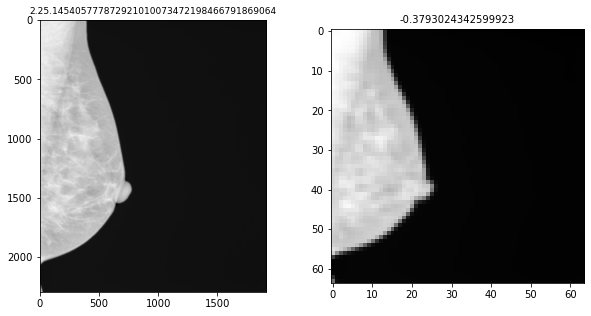

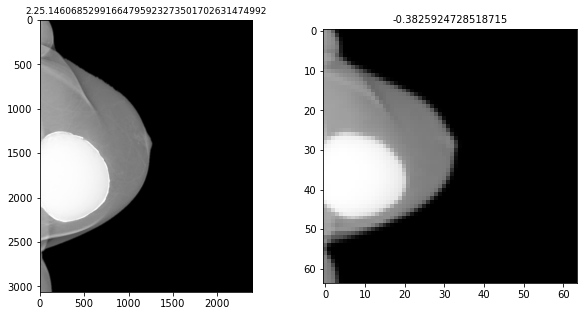

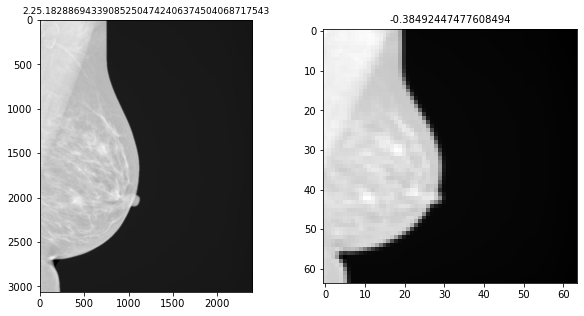

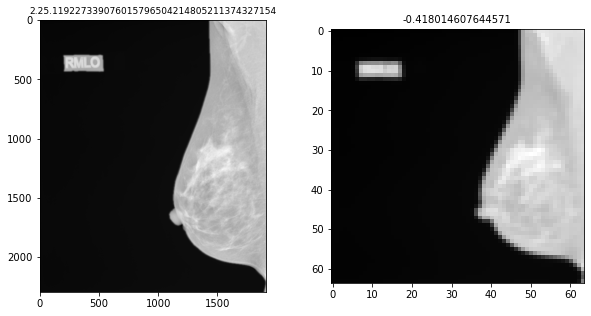

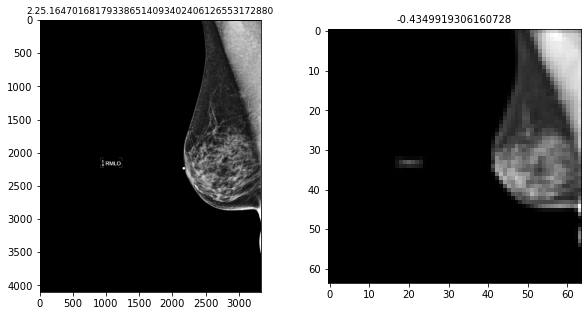

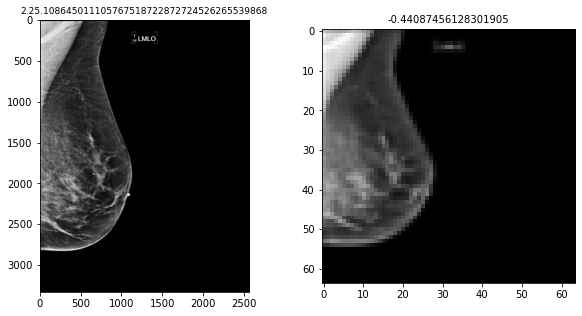

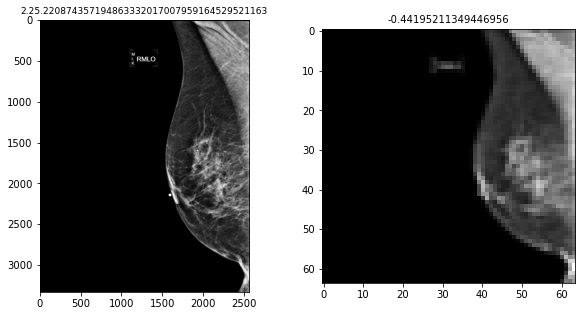

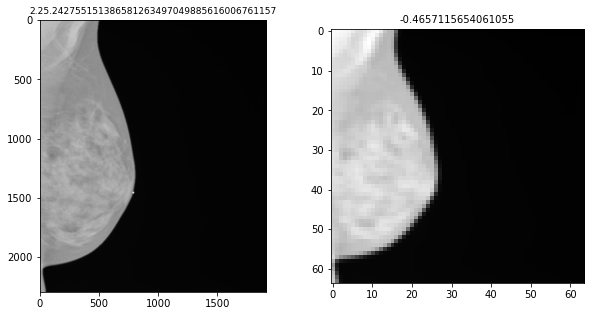

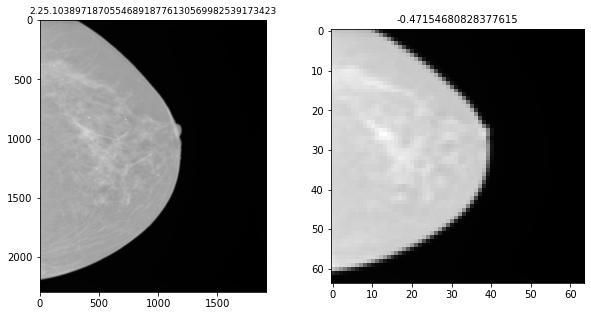

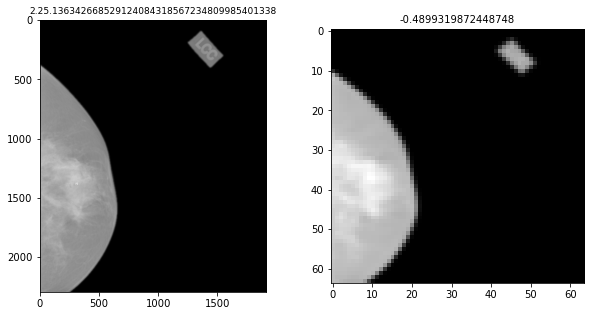

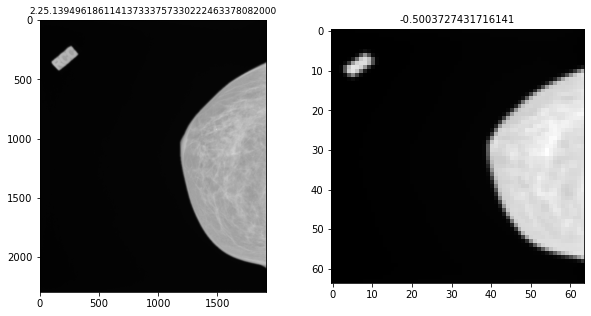

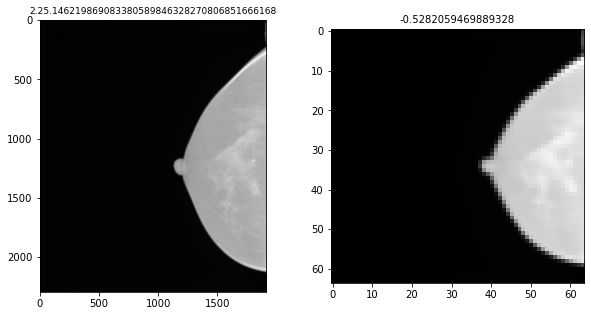

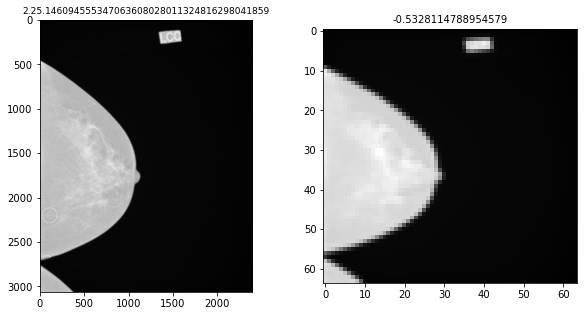

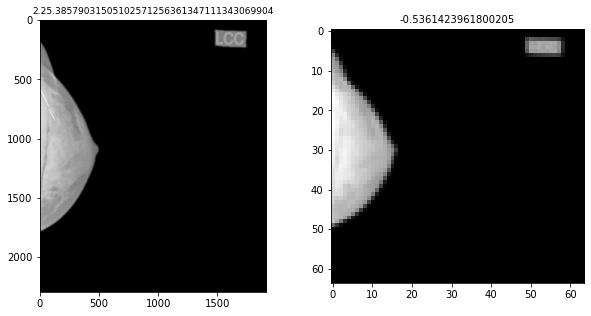

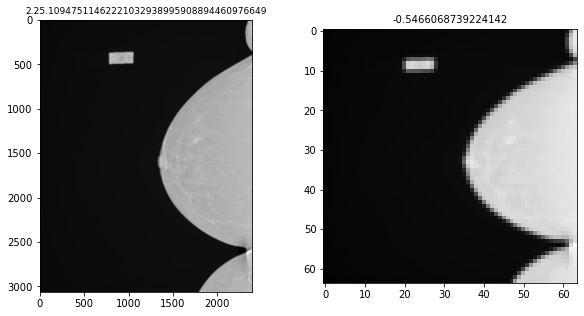

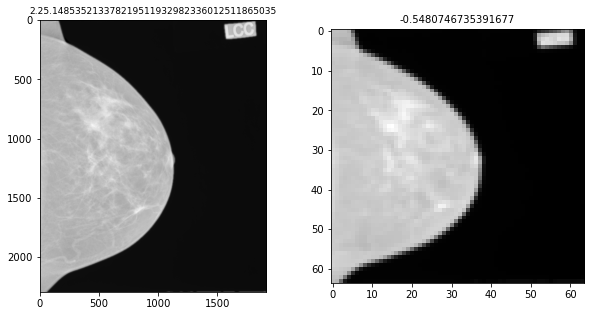

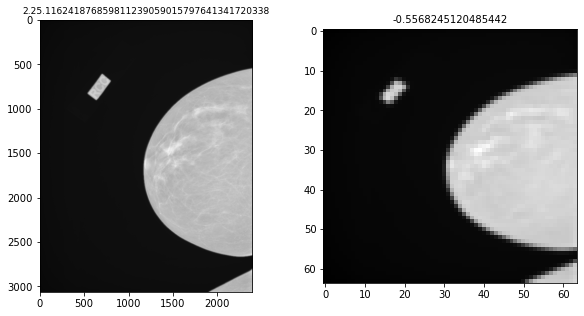

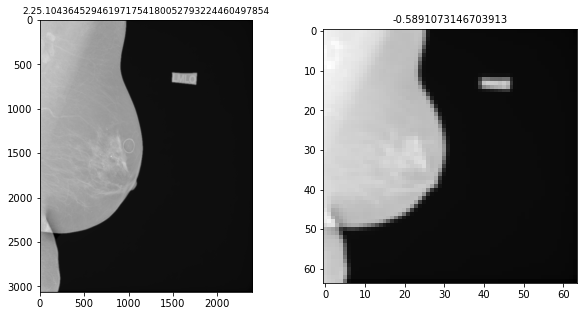

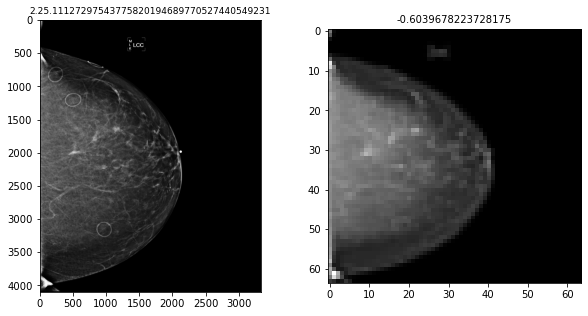

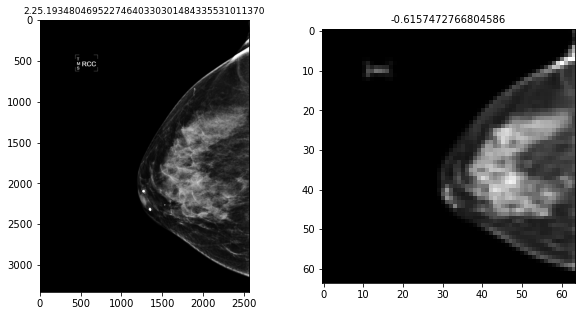

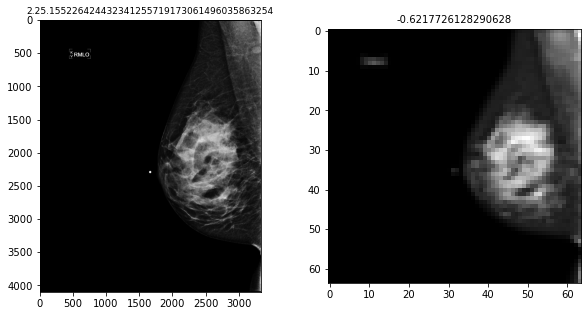

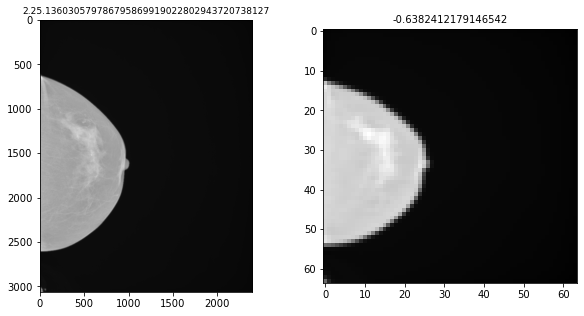

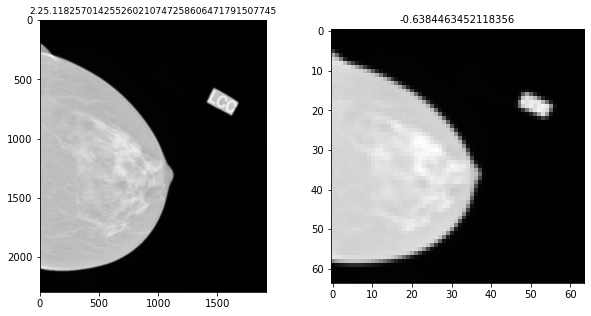

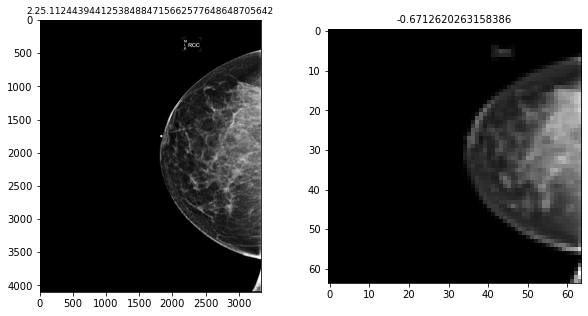

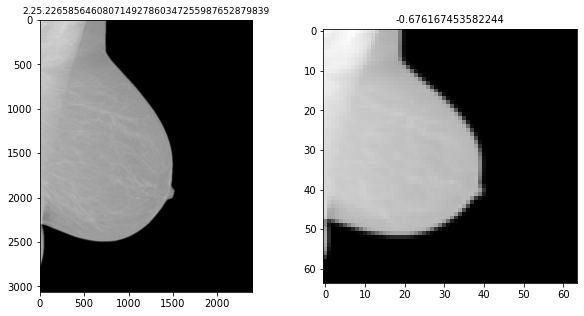

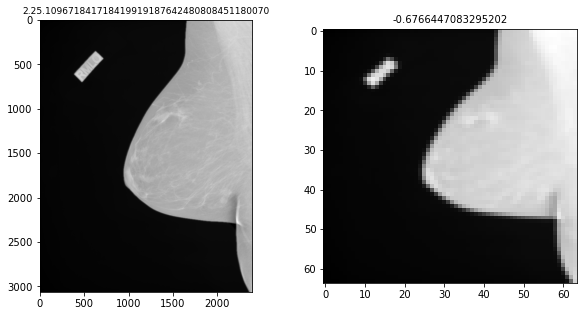

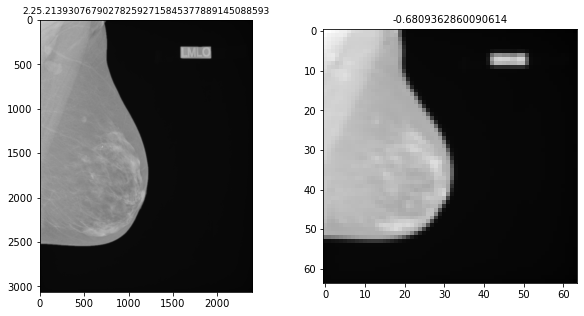

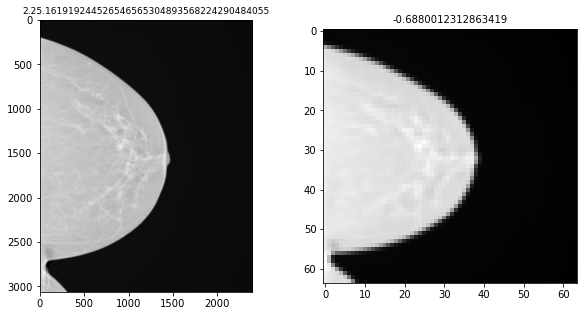

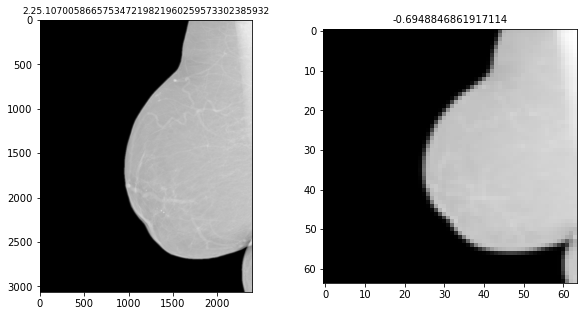

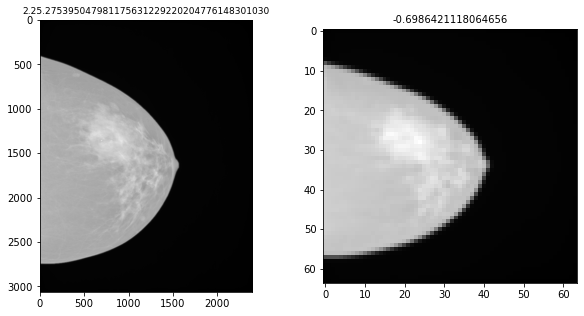

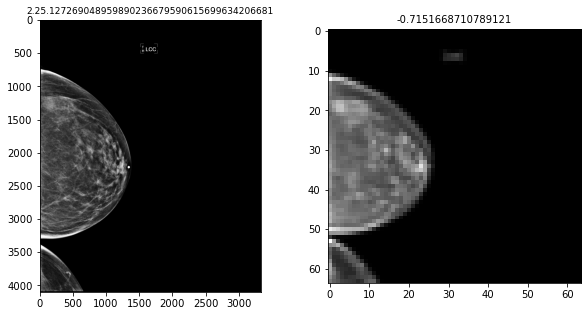

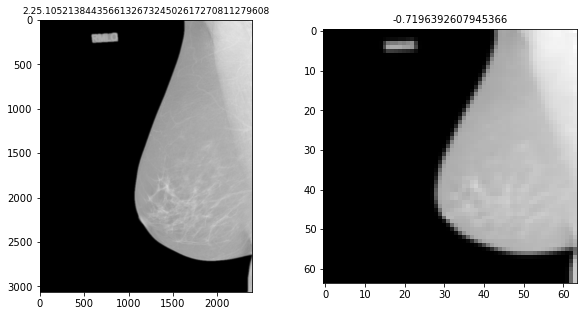

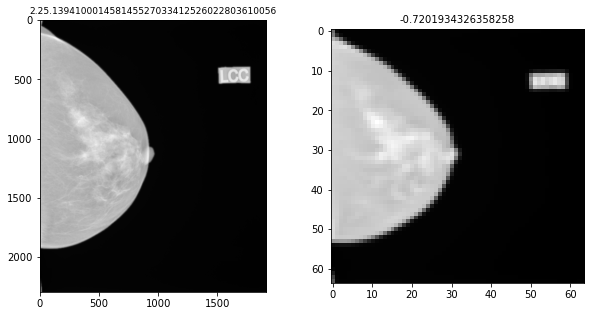

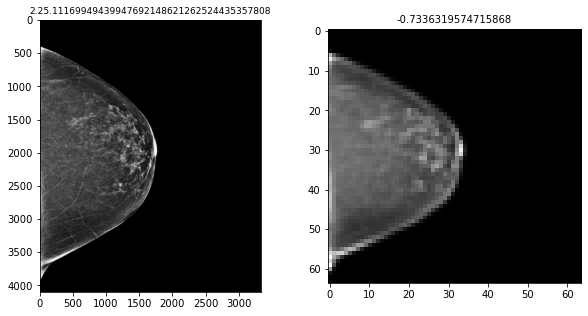

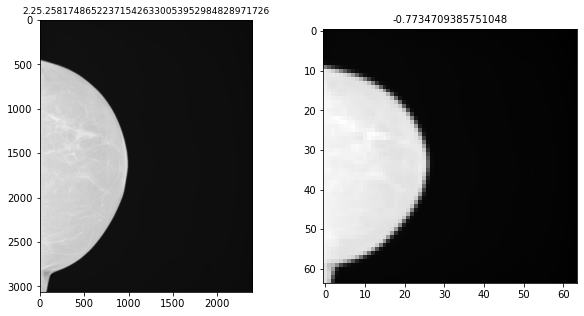

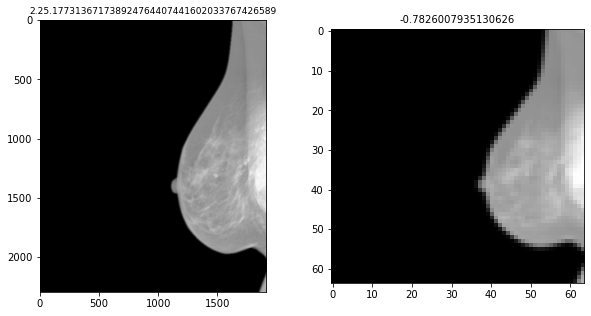

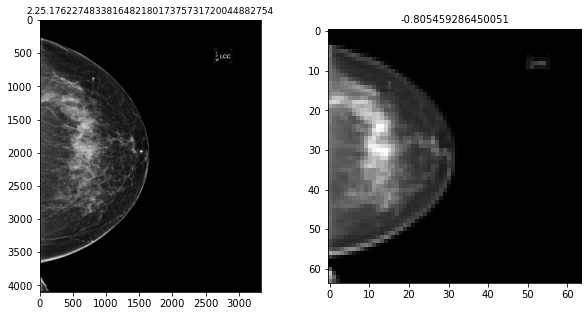

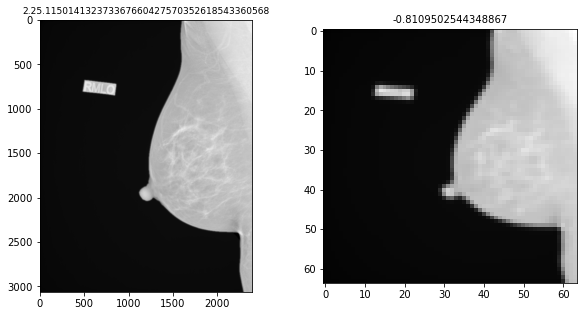

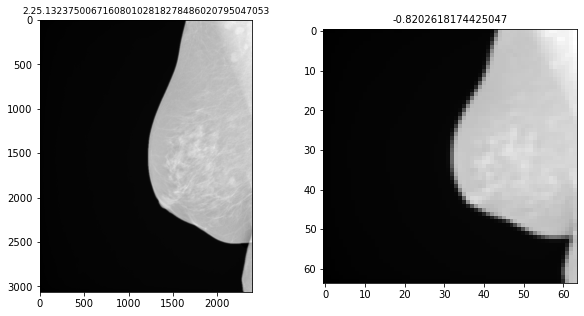

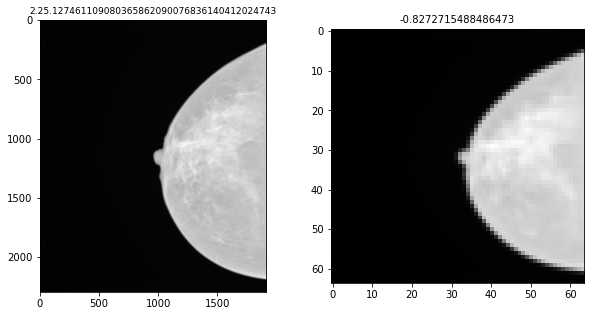

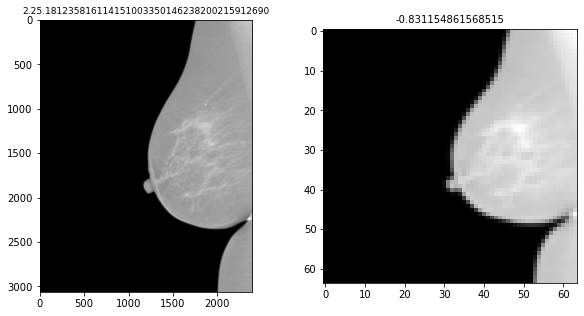

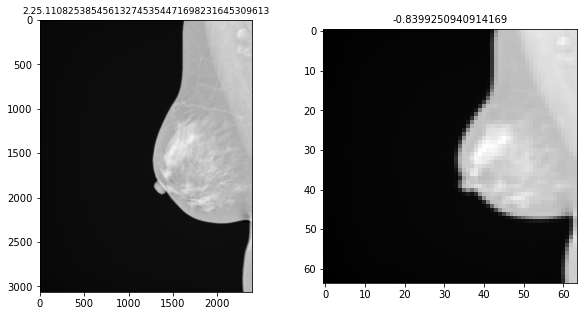

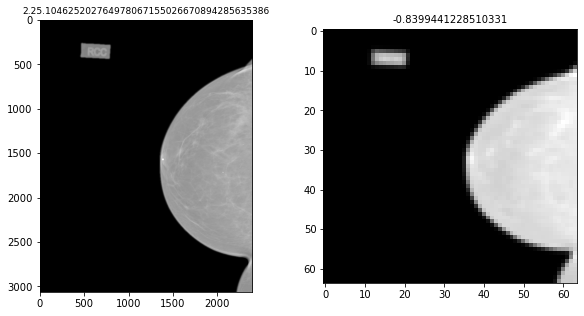

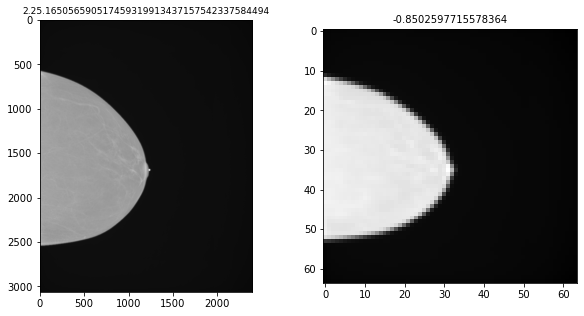

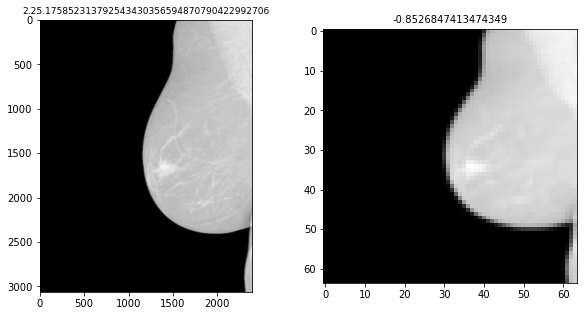

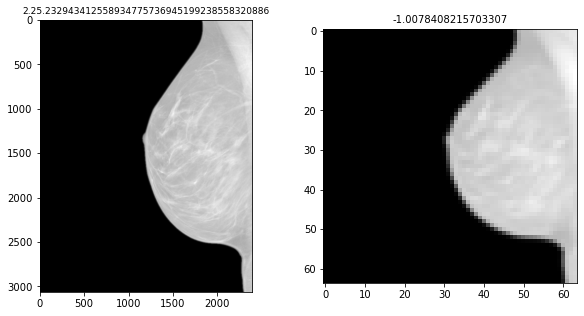

In [7]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(downsampled_imgs, pyod_algorithm='SUOD')
O.Features.view_image_and_features(imgs, ['downsample'], train_scores=[train_scoresX])

In [ ]:
# initialized a group of outlier detectors for acceleration
# detector_list = [LOF(n_neighbors=15), LOF(n_neighbors=20),
#                  LOF(n_neighbors=25), LOF(n_neighbors=35),
#                  COPOD(), IForest(n_estimators=100),
#                  IForest(n_estimators=200)]

# # decide the number of parallel process, and the combination method
# # then clf can be used as any outlier detection model
# clf = SUOD(base_estimators=detector_list, n_jobs=2, combination='average',
#            verbose=False)